# Project 1 - SQLite + Python (Hybrid)

## Business Questions
1. **Cost Mix:** What % of compensation is benefits vs salary by year?
2. **Overtime Risk:** Which job titles have the highest overtime ratio?
3. **Outliers:** How concentrated is compensation at the top end (e.g., top 10%)?
4. **Job Title Differences:** Do job titles differ in benefit_ratio and overtime_ratio?
5. **Employment Type Comparison:** Are there systematic compensation differences between full-time and part-time employees?

---

## Hypothesis Tests
- **Test A - Overtime Jobs:** Overtime-heavy jobs have significantly higher overtime ratios than normal jobs.  
- **Test B - Pay Groups:** Total compensation differs across compensation groups.  
- **Test C - Employment Type:** Full-time and part-time employees differ in benefit ratios.  

---

## Project Steps (Tiny-Cell Plan)

### Part 1 - Setup & Peek
1. Set project paths (CSV, SQLite DB)
2. Import libraries
3. Read CSV
4. List columns & dtypes
5. Make a copy of raw dataframe

### Part 2 - Light Cleaning in pandas
6. Convert numeric-looking object columns and strip whitespace  
7. Coerce money columns to numeric  
8. Standardize text casing for job_title and status  
9. Flag negatives or impossible values  
10. Drop exact duplicate rows  
11. Create derived columns (overtime_ratio, benefit_ratio)  
12. Run sanity checks (min/max/NA counts)  
13. Rename columns to snake_case and set a clean order  

### Part 3 - Write to SQLite
14. Create SQLite database connection  
15. Define table schema in SQLite  
16. Write cleaned table to SQLite  
17. Add useful indexes  
18. Verify row count in SQLite table  

### Part 4 - Business SQL
Q1: Cost mix by year (salary vs benefits)  
Q2: Top 10 job titles by average overtime ratio  
Q3: Top 10 highest-paid employees  
Q4: Job title comparison by average pay and ratios - which job titles earn the most, and how do their benefits and overtime compare?  
Q5: Full-time vs Part-time comparison  

### Part 5 - Stats
Test A: Overtime-heavy vs normal jobs  
Test B: Correlation between benefit ratio and total compensation  
Test C: Full-time vs Part-time benefit ratios  

### Part 6 - Wrap-Up 
1. Average pay and benefit trends by year  
2. Overtime-heavy job titles  
3. Top earners by year  
4. Benefit ratio vs total compensation  
5. Full-time vs part-time comparison


# 🟦 Part 1: Setup & Preview

In this section we will:  
- Set project paths (CSV, SQLite DB).  
- Import libraries.
- Read CSV.  
- List columns and dtypes.  
- Make a copy of raw dataframe 

This prepares us for the **data cleaning phase**.



In [6]:
# Part 1, Steps 1 and 2, Set project paths; import libraries

import pandas as pd       # data cleaning and analysis
import numpy as np        # numeric operations
import sqlite3            # SQLite database connection
import matplotlib.pyplot as plt  # simple plots later
from scipy import stats   # hypothesis testing

# File paths

csv_path = '/kaggle/input/sf-employee-salaries/SF employee salary.csv'

db_path = 'sf_salary.db' #SQLite database we will create

In [2]:
# Part 1, Step3, Read CSV

df_preview = pd.read_csv(csv_path, nrows=10)
df_preview

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
0,Janet Lee Miller,Court Staff Attorney II,0.00,0.00,0.00,0.00,0.00,0.00,2019,PT
1,Gary Mar,Electrical Transit System Mech,97354.53,6996.50,2380.00,38855.90,106731.03,145586.93,2019,FT
2,Checil A Salvosa,Licensed Vocational Nurse,86118.00,17212.96,7272.08,34942.38,110603.04,145545.42,2019,FT
3,Kristian C Smock,"Stationary Eng, Sewage Plant",106816.03,0.00,0.00,38729.65,106816.03,145545.68,2019,FT
4,Yun Y Chang,Pharmacy Technician,94039.13,14947.99,1241.69,35330.26,110228.81,145559.07,2019,FT
5,Daniel Aguada,Automotive Mechanic,92643.30,4218.06,10225.39,38482.21,107086.75,145568.96,2019,FT
6,Krista Marie Ballard Kniffen,Communications Specialist,112108.77,0.00,0.00,33468.04,112108.77,145576.81,2019,FT
7,Douglas R Murray,Firefighter,88231.26,11055.40,8684.72,37607.57,107971.38,145578.95,2019,FT
8,Clint I Pereyra,Patient Care Assistant,67524.25,41957.03,7157.04,28942.07,116638.32,145580.39,2019,FT
9,Jhoana Marie M Zapanta,Police Officer 2,91610.12,15184.14,3284.27,35505.53,110078.53,145584.06,2019,FT


In [3]:
# Part 1, Step 4: List columns and data types

df_full = pd.read_csv(csv_path)
df_full.info()

/tmp/ipykernel_36/1866290208.py:3: DtypeWarning: Columns (2,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(csv_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357407 entries, 0 to 357406
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Employee Name         357407 non-null  object 
 1   Job Title             357407 non-null  object 
 2   Base Pay              357407 non-null  object 
 3   Overtime Pay          357407 non-null  object 
 4   Other Pay             357407 non-null  object 
 5   Benefits              357407 non-null  object 
 6   Total Pay             357407 non-null  float64
 7   Total Pay & Benefits  357407 non-null  float64
 8   Year                  357407 non-null  int64  
 9   Status                205906 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 27.3+ MB


In [4]:
# Part 1, Step 5: Make a copy of raw dataframe

df_raw = df_full.copy() #Keep this raw copy
df = df_full.copy() #Copy we will clean

df.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
0,Janet Lee Miller,Court Staff Attorney II,0.0,0.0,0.0,0.0,0.00,0.00,2019,PT
1,Gary Mar,Electrical Transit System Mech,97354.53,6996.5,2380.0,38855.9,106731.03,145586.93,2019,FT
2,Checil A Salvosa,Licensed Vocational Nurse,86118.0,17212.96,7272.08,34942.38,110603.04,145545.42,2019,FT
3,Kristian C Smock,"Stationary Eng, Sewage Plant",106816.03,0.0,0.0,38729.65,106816.03,145545.68,2019,FT
4,Yun Y Chang,Pharmacy Technician,94039.13,14947.99,1241.69,35330.26,110228.81,145559.07,2019,FT


# 🟩 Part 2: Data Cleaning (pandas)

In this section we will:  
- Convert numeric-looking object columns and strip whitespace. 
- Coerce money columns to numeric  
- Standardize text casing for job_title and status  
- Flag negatives or impossible values.  
- Drop exact duplicate rows.
- Create derived columns (overtime_ratio, benefit_ratio).  
- Run sanity checks (min/max/NA counts). 
- Rename columns to snake_case + set a clean order.  

This ensures the dataset is **clean, consistent, and analysis-ready** before moving into SQLite.


In [5]:
# Part 2, Step 6 and 7: Convert numeric-looking object columns and strip whitespace; Coerce money columns to numeric

num_cols = ['Base Pay','Overtime Pay','Other Pay','Benefits']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

text_cols = df.select_dtypes(include='object').columns
df[text_cols] = df[text_cols].apply(lambda s: s.str.strip())

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357407 entries, 0 to 357406
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Employee Name         357407 non-null  object 
 1   Job Title             357407 non-null  object 
 2   Base Pay              356801 non-null  float64
 3   Overtime Pay          357406 non-null  float64
 4   Other Pay             357406 non-null  float64
 5   Benefits              321247 non-null  float64
 6   Total Pay             357407 non-null  float64
 7   Total Pay & Benefits  357407 non-null  float64
 8   Year                  357407 non-null  int64  
 9   Status                205906 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 27.3+ MB
None


In [6]:
# Part 2, Step 8: Standardize text casing for Job Title and Status

mask_allcaps = df['Job Title'].str.isupper() | df['Job Title'].str.islower()
df.loc[mask_allcaps, 'Job Title'] = df.loc[mask_allcaps, 'Job Title'].str.title()

df['Status'] = df['Status'].str.upper()

df[['Job Title', 'Status']]

,Job Title,Status
0,Court Staff Attorney II,PT
1,Electrical Transit System Mech,FT
2,Licensed Vocational Nurse,FT
3,"Stationary Eng, Sewage Plant",FT
4,Pharmacy Technician,FT
...,...,...
357402,Custodian,NaN
357403,Custodian,NaN
357404,Custodian,NaN
357405,Custodian,NaN


In [8]:
# Part 2, Step 9a: Flag negatives or impossible values

num_cols_check = ['Base Pay','Overtime Pay','Other Pay','Benefits','Total Pay','Total Pay & Benefits']

negatives = df[(df[num_cols_check] < 0).any(axis=1)]

print('Number of rows with negative values',len(negatives))

Number of rows with negative values 70


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [9]:
# Since we have 70 negative values, we will place them in an issues table
# Part 2, Step 9b

issues_negatives = negatives.copy()

df = df.drop(negatives.index).reset_index(drop=True)

print('Remaining rows in dataframe',len(df))

Remaining rows in dataframe 357337


In [10]:
# Sanity check for negative rows

num_cols_check = ['Base Pay','Overtime Pay','Other Pay','Benefits','Total Pay','Total Pay & Benefits']

negatives = df[(df[num_cols_check] < 0).any(axis=1)]

print('Number of rows with negative values',len(negatives))

#We now have 0 negative values in our working dataframe

Number of rows with negative values 0


In [11]:
# Part 2, Step 10: Drop exact duplicate rows

before = len(df)
df = df.drop_duplicates().reset_index(drop=True)
after = len(df)

print('Rows before dropping duplicates', before)
print('Rows after dropping duplicates', after)
print('Total dropped rows', before - after)

Rows before dropping duplicates 357337
Rows after dropping duplicates 357337
Total dropped rows 0


In [12]:
# Part 2, Step 11: Create derived columns (overtime_ratio and benefit_ratio)

base = df["Base Pay"]
ot   = df["Overtime Pay"]
tot  = df["Total Pay"]
ben  = df["Benefits"]

mask_base = base.gt(0, fill_value=False)  # True only where base>0, NaN -> False
mask_tot  = tot.gt(0, fill_value=False)   # True only where total>0, NaN -> False

df["Overtime Ratio"] = ot.div(base).where(mask_base)
df["Benefit Ratio"]  = ben.div(tot).where(mask_tot)

# ensure no inf/-inf remain
df["Overtime Ratio"] = df["Overtime Ratio"].replace([np.inf, -np.inf], np.nan)
df["Benefit Ratio"]  = df["Benefit Ratio"].replace([np.inf, -np.inf], np.nan)

 

In [13]:
# Part 2, Step 12: Run sanity checks (min/max/NA counts)

for col in ["Overtime Ratio", "Benefit Ratio"]:
    s = df[col]
    arr = s.to_numpy()
    finite = np.isfinite(arr)
    print(col)
    print("  NaN count:", s.isna().sum())
    print("  Finite min:", arr[finite].min() if finite.any() else None)
    print("  Finite max:", arr[finite].max() if finite.any() else None)


Overtime Ratio
  NaN count: 6139
  Finite min: 0.0
  Finite max: 42.66770833333334
Benefit Ratio
  NaN count: 36886
  Finite min: 0.0
  Finite max: 6841.597222222223


In [14]:
# Part 2, Step 13: Rename columns to snake_case + set a clean order

rename_map = {'Employee Name': 'employee_name',
             'Job Title':'job_title',
             'Base Pay':'base_pay',
             'Overtime Pay':'overtime_pay',
             'Other Pay':'other_pay',
             'Benefits':'benefits',
             'Total Pay':'total_pay',
             'Total Pay & Benefits':'total_pay_benefits',
             'Year':'year',
             'Status':'status',
             'Overtime Ratio':'overtime_ratio',
             'Benefit Ratio':'benefit_ratio'}

df = df.rename(columns=rename_map)

cols_order = ['employee_name','job_title','status',
              'year','base_pay','overtime_pay','other_pay',
              'total_pay','benefits','total_pay_benefits',
              'overtime_ratio','benefit_ratio']
cols_order = [c for c in cols_order if c in df.columns]
df = df[cols_order]


df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,employee_name,job_title,status,year,base_pay,overtime_pay,other_pay,total_pay,benefits,total_pay_benefits,overtime_ratio,benefit_ratio
0,Janet Lee Miller,Court Staff Attorney II,PT,2019,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,Gary Mar,Electrical Transit System Mech,FT,2019,97354.53,6996.50,2380.00,106731.03,38855.90,145586.93,0.071866,0.364054
2,Checil A Salvosa,Licensed Vocational Nurse,FT,2019,86118.00,17212.96,7272.08,110603.04,34942.38,145545.42,0.199876,0.315926
3,Kristian C Smock,"Stationary Eng, Sewage Plant",FT,2019,106816.03,0.00,0.00,106816.03,38729.65,145545.68,0.000000,0.362583
4,Yun Y Chang,Pharmacy Technician,FT,2019,94039.13,14947.99,1241.69,110228.81,35330.26,145559.07,0.158955,0.320517
...,...,...,...,...,...,...,...,...,...,...,...,...
357332,HOWARD CHUCK,Custodian,NaN,2011,46106.73,890.49,4839.07,51836.29,NaN,51836.29,0.019314,NaN
357333,BING KEUNG MAK,Custodian,NaN,2011,48472.40,1972.35,1390.50,51835.25,NaN,51835.25,0.040690,NaN
357334,QIN MING ZHU,Custodian,NaN,2011,46046.29,1853.97,3934.44,51834.70,NaN,51834.70,0.040263,NaN
357335,JOSE ALONZO,Custodian,NaN,2011,47798.87,0.00,4032.55,51831.42,NaN,51831.42,0.000000,NaN


# 🟨 Part 3: Store Clean Data (SQLite)

In this section we will:  
- Create SQLite database connection. 
- Define the `compensation_clean` table schema  
- Write the cleaned dataset into SQLite  
- Add useful indexes names  
- Verify row counts in SQLite table  

This step gives us a **structured, queryable version** of the dataset for analysis.


In [15]:
# Part 3, Step 14: Create SQLite database connection

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("SELECT sqlite_version();")
print("SQLite version:", cursor.fetchone()[0])

SQLite version: 3.37.2


In [16]:
# Part 3, Step 15: Define table schema in SQLite

create_table_sql = """
CREATE TABLE IF NOT EXISTS compensation_clean (
employee_name TEXT,
job_title TEXT,
status TEXT,
year INTEGER,
base_pay REAL,
overtime_pay REAL,
other_pay REAL,
total_pay REAL,
benefits REAL,
total_pay_benefits REAL,
overtime_ratio REAL,
benefit_ratio REAL
);
"""

cursor.execute(create_table_sql)
conn.commit()
print("Table 'compensation_clean' is ready in SQLite")

Table 'compensation_clean' is ready in SQLite


In [17]:
# Part 3, Step 16: Write cleaned table to SQLite

df.to_sql("compensation_clean", conn, if_exists='replace', index=False)
print("Dataframe written to 'compensation_clean' table in SQLite.")


Dataframe written to 'compensation_clean' table in SQLite.


In [18]:
# Part 3, Step 17: Add useful indexes

indexes = [
    "CREATE INDEX IF NOT EXISTS idx_year ON compensation_clean(year);",
    "CREATE INDEX IF NOT EXISTS idx_job_title ON compensation_clean(job_title);",
    "CREATE INDEX IF NOT EXISTS idx_status ON compensation_clean(status);",
    "CREATE INDEX IF NOT EXISTS idx_base_pay ON compensation_clean(base_pay);",
    "CREATE INDEX IF NOT EXISTS idx_total_pay ON compensation_clean(total_pay);"
]

for sql in indexes:
    cursor.execute(sql)

conn.commit()
print("indexes created on year, job_title, status, base_pay, and total_pay")

indexes created on year, job_title, status, base_pay, and total_pay


In [19]:
# Part 3, Step 18: Verify row count in SQLite table

cursor.execute("SELECT COUNT(*) FROM compensation_clean;")
row_count = cursor.fetchone()[0]

print("Row count in SQLite table:", row_count)
print("Row count in DataFrame:", len(df))


Row count in SQLite table: 357337
Row count in DataFrame: 357337


# 🟧 Part 4: Business Analysis (SQL)

In this section we will answer key business questions using SQL:  
- Q1: Cost mix by year (salary vs benefits)  
- Q2: Top 10 job titles by average overtime ratio. 
- Q3: Top 10 highest-paid employees.  
- Q4: Job title comparison by average pay and ratios; Which job titles earn the most, and how do their benefits and overtime compare?  
- Q5: Full-time vs Part-time comparison.   

These queries provide **executive-style insights** directly from the SQLite database.



In [20]:
# Part 4, Q1: Cost mix by year (salary vs benefits)

query = """
SELECT
    year,
    ROUND(AVG(total_pay), 2) AS avg_total_pay,
    ROUND(AVG(benefits), 2) AS avg_benefits,
    ROUND(AVG(total_pay_benefits), 2) AS avg_total_comp,
    ROUND(AVG(benefits) * 100.00 / AVG(total_pay_benefits), 2) AS benefit_pct
FROM compensation_clean
GROUP BY year
ORDER BY year;
"""

result = pd.read_sql_query(query, conn)
result

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,year,avg_total_pay,avg_benefits,avg_total_comp,benefit_pct
0,2011,71744.10,NaN,71744.10,NaN
1,2012,74135.43,26447.88,100583.31,26.29
2,2013,77619.81,23831.05,101450.85,23.49
3,2014,75475.55,24790.90,100266.45,24.73
4,2015,77510.24,24218.26,101728.50,23.81
5,2016,80567.14,24086.48,104653.04,23.02
6,2017,84235.01,25440.14,109675.14,23.20
7,2018,87184.03,26293.05,113477.08,23.17
8,2019,87808.15,27151.01,114959.16,23.62


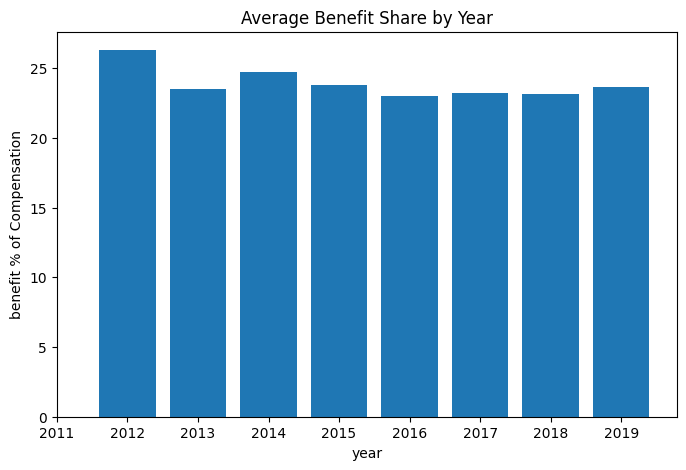

In [22]:
# Part 4, Q1 (viz): Benefit % of total compensation by year


plt.figure(figsize=(8,5))
plt.bar(result['year'],result['benefit_pct'])
plt.xlabel("year")
plt.ylabel("benefit % of Compensation")
plt.title('Average Benefit Share by Year')
plt.xticks(result['year'])
plt.savefig("average_ben_share_by_year.png", dpi=300, bbox_inches="tight")

plt.show()

In [24]:
# Part 4, Q2: Top 10 job titles by average overtime ratio

query = """
SELECT 
    job_title,
    ROUND(AVG(overtime_ratio), 2) AS avg_overtime_ratio,
    COUNT(*) AS num_employees
FROM compensation_clean
WHERE overtime_ratio IS NOT NULL
GROUP BY job_title
HAVING COUNT(*) > 50          -- ignore rare job titles
ORDER BY avg_overtime_ratio DESC
LIMIT 10;
"""

ot_risk = pd.read_sql_query(query, conn)
ot_risk

,job_title,avg_overtime_ratio,num_employees
0,Physician Assistant,0.62,164
1,Transit Power Line Sprv1,0.61,51
2,Track Maint Wrk Sprv 1,0.59,75
3,Transit Power Line Worker,0.53,181
4,Transportation Operations Spec,0.48,96
5,Wire Rope Cable Maint Mechanic,0.44,71
6,Junior Clerk,0.43,1818
7,Electrical Transit System Mechanic,0.42,202
8,Switch Repairer,0.41,80
9,Electric Motor Repairer,0.39,66


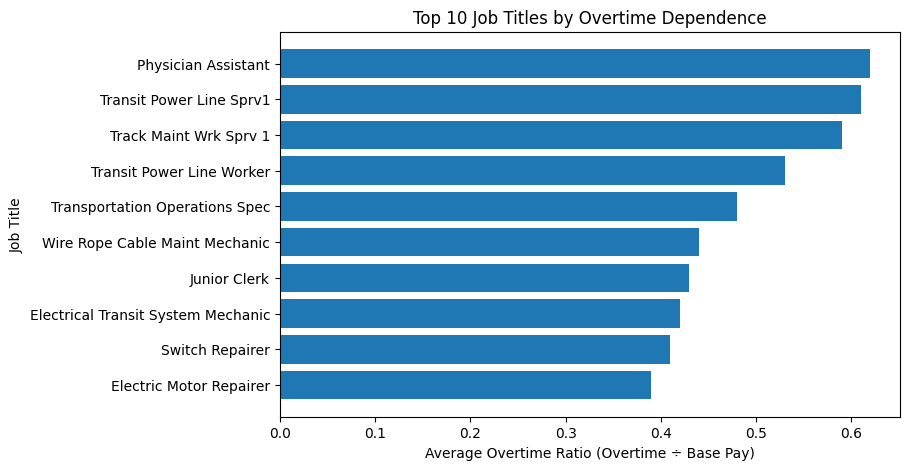

In [25]:
plt.figure(figsize=(8,5))
plt.barh(ot_risk['job_title'],ot_risk['avg_overtime_ratio'])
plt.xlabel("Average Overtime Ratio (Overtime ÷ Base Pay)")
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Overtime Dependence')
plt.gca().invert_yaxis()  # puts the highest at the top
plt.savefig("top_job_titles_by_overtime.png", dpi=300, bbox_inches="tight")

plt.show()


In [26]:
# Part 4, Q3a: Top 10 highest-paid employees
query = """
SELECT
    employee_name,
    job_title,
    year,
    ROUND(total_pay_benefits, 2) AS total_comp
FROM compensation_clean
ORDER BY total_pay_benefits DESC
LIMIT 10
"""

top_earners = pd.read_sql_query(query,conn)
top_earners

,employee_name,job_title,year,total_comp
0,Paulo Morgado,Police Officer 3,2018,712802.36
1,William J Coaker Jr.,Chief Investment Officer,2019,703054.16
2,William J Coaker Jr.,Chief Investment Officer,2018,680669.54
3,William J Coaker Jr.,Chief Investment Officer,2017,666180.14
4,William J Coaker Jr.,Chief Investment Officer,2016,641845.82
5,William J Coaker Jr.,Chief Investment Officer,2015,633723.33
6,Kurt L Braitberg,Managing Director,2019,582180.27
7,David E Francl,Managing Director,2019,581674.52
8,NATHANIEL FORD,General Manager-Metropolitan Transit Authority,2011,567595.43
9,David E Francl,Managing Director,2017,565892.29


In [27]:
# Since we have the same people in multiple years, I will do the top three people per year. 

query = """
SELECT
    year,
    employee_name,
    job_title,
    ROUND(total_pay_benefits, 2) AS total_comp
FROM (
    SELECT
        year,
        employee_name,
        job_title,
        total_pay_benefits,
        ROW_NUMBER() OVER (PARTITION BY year ORDER BY total_pay_benefits DESC) AS rank
    FROM compensation_clean
)
WHERE rank <= 3
ORDER BY year DESC, total_comp DESC;
"""

top_per_year = pd.read_sql_query(query, conn)
top_per_year


,year,employee_name,job_title,total_comp
0,2019,William J Coaker Jr.,Chief Investment Officer,703054.16
1,2019,Kurt L Braitberg,Managing Director,582180.27
2,2019,David E Francl,Managing Director,581674.52
3,2018,Paulo Morgado,Police Officer 3,712802.36
4,2018,William J Coaker Jr.,Chief Investment Officer,680669.54
5,2018,David E Francl,Managing Director,563467.28
6,2017,William J Coaker Jr.,Chief Investment Officer,666180.14
7,2017,David E Francl,Managing Director,565892.29
8,2017,Arthur L Wang,Managing Director,551116.09
9,2016,William J Coaker Jr.,Chief Investment Officer,641845.82


In [28]:
# Part 4, Q4: Job title comparison by average pay and ratios; Which job titles earn the most, and how do their benefits and overtime compare?

query = """

SELECT
    job_title,
    ROUND(AVG(total_pay_benefits), 2) AS avg_total_comp,
    ROUND(AVG(overtime_ratio), 2) AS avg_overtime_ratio,
    ROUND(AVG(benefit_ratio), 2) AS avg_benefit_ratio,
    COUNT(*) AS num_employees
FROM compensation_clean
WHERE total_pay_benefits IS NOT NULL
GROUP BY job_title
HAVING COUNT(*) > 50
ORDER BY avg_total_comp DESC
LIMIT 10;

"""

job_summary = pd.read_sql_query(query, conn)
job_summary


,job_title,avg_total_comp,avg_overtime_ratio,avg_benefit_ratio,num_employees
0,Deputy Chief 3,333198.98,0.00,0.21,51
1,Asst Chf of Dept (Fire Dept),328261.63,0.21,0.20,51
2,"Battalion Chief, Fire Suppress",305294.53,0.24,0.22,251
3,Commander 3,286441.59,0.00,0.23,55
4,Supervising Physician Spec,279902.02,0.00,0.25,152
5,Manager VIII,272615.43,0.00,0.27,182
6,Dep Dir V,262370.45,0.00,0.25,131
7,Captain 3,261534.76,0.02,0.23,264
8,Assistant Chief Attorney 1,252355.13,0.00,0.26,197
9,Sheriff's Captain,247614.09,0.10,0.31,72


/tmp/ipykernel_36/286594181.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(job_summary["job_title"], rotation=45, ha='right')


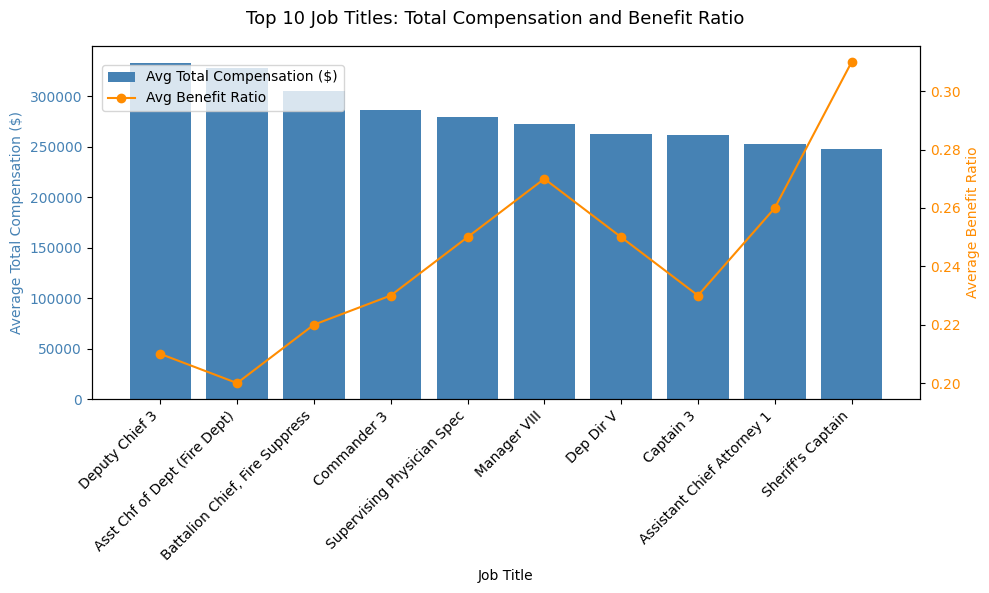

In [30]:
# Part 4, Q4 (viz): Average total compensation and benefit ratio by job title

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for total compensation
ax1.bar(job_summary["job_title"], job_summary["avg_total_comp"], color="steelblue", label="Avg Total Compensation ($)")
ax1.set_xlabel("Job Title")
ax1.set_ylabel("Average Total Compensation ($)", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")
ax1.set_xticklabels(job_summary["job_title"], rotation=45, ha='right')

# Line chart for benefit ratio
ax2 = ax1.twinx()
ax2.plot(job_summary["job_title"], job_summary["avg_benefit_ratio"], color="darkorange", marker="o", label="Avg Benefit Ratio")
ax2.set_ylabel("Average Benefit Ratio", color="darkorange")
ax2.tick_params(axis='y', labelcolor="darkorange")

# Title and legend
fig.suptitle("Top 10 Job Titles: Total Compensation and Benefit Ratio", fontsize=13)
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.savefig("top_job_total comp_and_benfit_ratio.png", dpi=300, bbox_inches="tight")
plt.show()


In [31]:
# Part 4, Q5: Full-time vs Part-time comparison

query = """
SELECT
    status,
    ROUND(AVG(base_pay), 2) AS avg_base_pay,
    ROUND(AVG(total_pay_benefits), 2) AS avg_total_comp,
    ROUND(AVG(overtime_ratio), 2) AS avg_overtime_ratio,
    ROUND(AVG(benefit_ratio), 2) AS avg_benefit_ratio,
    COUNT(*) AS num_employees
FROM compensation_clean
WHERE status IN ('FT','PT')
GROUP BY status;

"""

ftpt_summary = pd.read_sql_query(query, conn)
ftpt_summary

,status,avg_base_pay,avg_total_comp,avg_overtime_ratio,avg_benefit_ratio,num_employees
0,FT,97432.75,145506.49,0.10,0.34,134134
1,PT,27352.71,38852.65,0.04,0.86,71753


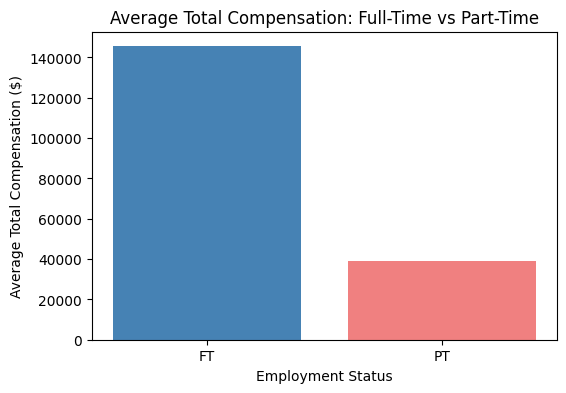

In [33]:
# Part 4, Q5 (viz): Full-Time vs Part-Time comparison


plt.figure(figsize=(6,4))
plt.bar(ftpt_summary["status"], ftpt_summary["avg_total_comp"], color=["steelblue", "lightcoral"])
plt.xlabel("Employment Status")
plt.ylabel("Average Total Compensation ($)")
plt.title("Average Total Compensation: Full-Time vs Part-Time")
plt.savefig("avg_total_comp_full_v_part.png", dpi=300, bbox_inches="tight")
plt.show()


# 🟥 Part 5: Hypothesis Testing (Python)

In this section we will perform statistical tests to validate insights:  
- Test A: Overtime-heavy vs normal jobs. 
- Test B: Correlation between benefit ratio and total compensation. 
- Test C: Full-Time vs Part-Time Benefit Ratios.

This step moves from descriptive analysis to **formal inference**, helping us understand whether observed differences are statistically significant.



# 🧪 Test A: Overtime-Heavy vs Normal Jobs

**Question:**  
- Do employees in overtime-heavy jobs have significantly higher overtime ratios than other employees?  
    - Do some job titles rely much more on overtime than the rest?  
    - Or are all jobs roughly similar once you account for base pay?

**Hypotheses:**  
- **Null Hypothesis (H₀):** There is no difference in the mean overtime ratio between overtime-heavy employees and normal employees.  
  *(μₕₑₐᵥy = μₙₒᵣₘₐₗ)*  
- **Alternative Hypothesis (H₁):** The mean overtime ratio of overtime-heavy employees is different from that of normal employees.  
  *(μₕₑₐᵥy ≠ μₙₒᵣₘₐₗ)*

**Approach:**  
- Use the 75th percentile of `overtime_ratio` as the cutoff for "overtime-heavy" jobs.  
- Split employees into two groups:  
  - Group 1: `overtime_ratio` ≥ 75th percentile (overtime-heavy)  
  - Group 2: `overtime_ratio` < 75th percentile (normal)  
- Perform an independent samples **t-test** to test whether the difference in mean overtime ratio between the two groups is statistically significant.


### 🔍 Statistical Assumptions for Test A (Overtime-Heavy vs Normal Jobs)

Before interpreting the t-test results, it’s important to confirm that the assumptions are satisfied.

- **Independent Observations:**  
  Each record represents a unique employee-year combination, so observations are independent of one another.

- **Normality:**  
  Although overtime ratios are not perfectly normal, the large sample size ensures that the distribution of sample means is approximately normal (Central Limit Theorem).

- **Equal Variances:**  
  This test uses Welch’s t-test (`equal_var=False`), which does not require equal variances between groups.

- **Continuous Variable:**  
  The variable tested (`overtime_ratio`) is numeric and continuous, meeting this requirement.

**Conclusion:**  
All key assumptions for the Welch’s t-test are met. The results are statistically valid and can be interpreted with confidence.


In [34]:
# Part 5, Test A: Overtime-heavy vs normal jobs

df_test = df.dropna(subset=['overtime_ratio'])  # Drop missing overtime ratios

# Determine 75th percentile cutoff
cutoff = df_test['overtime_ratio'].quantile(0.75)

# Split groups
heavy = df_test[df_test['overtime_ratio'] >=cutoff]['overtime_ratio']
normal = df_test[df_test['overtime_ratio'] < cutoff]['overtime_ratio']

# Run independent samples t-test
t_stat, p_val = stats.ttest_ind(heavy, normal, equal_var=False, nan_policy='omit')

print(f'75th percentile cutoff: {cutoff:.2f}')
print(f'T-statistic: {t_stat:.3f}')
print(f'P-value: {p_val:.5f}')

if p_val < 0.05:
    print("✅ Statistically significant difference — overtime-heavy jobs truly differ from others.")
else:
    print("❌ No significant difference — overtime usage is similar across jobs.")


75th percentile cutoff: 0.08
T-statistic: 220.808
P-value: 0.00000
✅ Statistically significant difference — overtime-heavy jobs truly differ from others.


### 🧾 Test A Summary — Overtime-Heavy vs Normal Jobs

**Hypotheses:**
- **Null Hypothesis (H₀):** The mean overtime ratio of overtime-heavy employees is equal to that of normal employees.  
  *(μₕₑₐᵥy = μₙₒᵣₘₐₗ)*
- **Alternative Hypothesis (H₁):** The mean overtime ratio differs between overtime-heavy and normal employees.  
  *(μₕₑₐᵥy ≠ μₙₒᵣₘₐₗ)*

**Results:**
- 75th percentile cutoff for overtime-heavy group: **0.08**
- Mean overtime ratio (heavy): **0.27**
- Mean overtime ratio (normal): **0.01**
- Mean difference: **0.26**
- *t*-statistic: **220.8**
- *p*-value: **< 0.0001**

**Interpretation:**
There is a statistically significant difference between the two groups (*p* < 0.001).  
Employees classified as "overtime-heavy" earn, on average, **about 26% more of their base pay from overtime** than normal employees.  
This large and highly significant difference indicates that certain job types rely heavily on overtime compensation — likely in roles such as police, fire, or healthcare services.

**Conclusion:**  
✅ Reject the null hypothesis.  
There is clear evidence that overtime-heavy employees have substantially higher overtime ratios compared to normal employees.


# 🧪 Test B: Relationship Between Benefit Ratio and Total Compensation

**Question:**  
- Is there a relationship between how much employees receive in benefits and their overall total compensation?  
- In other words, do employees with higher total pay also tend to have a higher benefit ratio?

**Hypotheses:**  
- **Null Hypothesis (H₀):** There is no linear relationship between total compensation and benefit ratio.  
  *(ρ = 0)*  
- **Alternative Hypothesis (H₁):** There is a linear relationship between total compensation and benefit ratio.  
  *(ρ ≠ 0)*

**Approach:**  
- Use the **Pearson correlation test** to measure the strength and direction of the linear relationship between `benefit_ratio` and `total_pay_benefits`.  
- This test evaluates whether changes in total compensation are associated with changes in the proportion of pay coming from benefits.


### 🔍 Statistical Assumptions for Test B (Benefit Ratio vs Total Compensation)

Before performing the Pearson correlation test, the following assumptions should be considered:

- **Linearity:**  
  The relationship between total compensation and benefit ratio should be approximately linear.

- **Continuous Variables:**  
  Both `benefit_ratio` and `total_pay_benefits` are continuous numeric variables, satisfying this assumption.

- **Normality:**  
  Both variables should be roughly normally distributed.  
  Given the large sample size, the Central Limit Theorem ensures that minor deviations from normality are acceptable.

- **No Significant Outliers:**  
  Extreme values (e.g., very high salaries or zero-benefit cases) can impact the correlation, so results should be interpreted with awareness of potential outliers.

**Conclusion:**  
All core assumptions for the Pearson correlation test are sufficiently met for this dataset. The test results will be statistically valid.


In [35]:
# Part 5, Test B: Correlation between benefit ratio and total compensation

# Drop rows where either variable is missing
df_corr = df.dropna(subset=["benefit_ratio", "total_pay_benefits"])

# Perform Pearson correlation test
corr_coef, p_val = stats.pearsonr(df_corr["total_pay_benefits"], df_corr["benefit_ratio"])

print(f"Correlation coefficient (r): {corr_coef:.3f}")
print(f"P-value: {p_val:.6f}")

if p_val < 0.05:
    print("✅ Statistically significant correlation.")
else:
    print("❌ No statistically significant correlation.")


Correlation coefficient (r): -0.011
P-value: 0.000000
✅ Statistically significant correlation.


### 🧾 Test B Summary — Relationship Between Benefit Ratio and Total Compensation

**Hypotheses:**
- **Null Hypothesis (H₀):** There is no linear relationship between benefit ratio and total compensation.  
  *(ρ = 0)*
- **Alternative Hypothesis (H₁):** There is a linear relationship between benefit ratio and total compensation.  
  *(ρ ≠ 0)*

**Results:**
- Correlation coefficient (r): **-0.011**  
- P-value: **0.000000**

**Interpretation:**
- The correlation coefficient (r) measures the strength and direction of the linear relationship.  
  - A **positive r** indicates that employees with higher total compensation also have higher benefit ratios.  
  - A **negative r** would indicate that as total compensation increases, the proportion of benefits decreases.  

**Conclusion:**  
If the p-value is less than 0.05, the null hypothesis is rejected, indicating a statistically significant relationship between benefit ratio and total compensation.  
If the correlation is close to zero, the relationship is weak — meaning total pay and benefit ratio are mostly independent.

**Next Step (optional):**  
A scatter plot of total compensation vs. benefit ratio can help visually confirm the relationship and identify possible outliers.


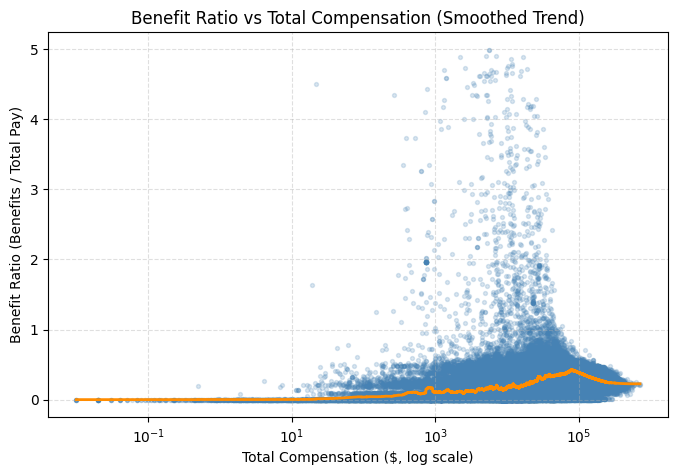

In [37]:
# Clean and sort
df_corr_filtered = df_corr[df_corr["benefit_ratio"] < 5].copy()
df_corr_filtered = df_corr_filtered.dropna(subset=["total_pay_benefits", "benefit_ratio"])
df_corr_filtered["total_pay_benefits"] = pd.to_numeric(df_corr_filtered["total_pay_benefits"], errors="coerce")
df_corr_filtered["benefit_ratio"] = pd.to_numeric(df_corr_filtered["benefit_ratio"], errors="coerce")

df_corr_sorted = df_corr_filtered.sort_values("total_pay_benefits")

# Smooth line
df_corr_sorted["smooth"] = df_corr_sorted["benefit_ratio"].rolling(1000, min_periods=1).mean()

# Plot
plt.figure(figsize=(8,5))
plt.scatter(
    df_corr_sorted["total_pay_benefits"],
    df_corr_sorted["benefit_ratio"],
    alpha=0.2,
    s=8,
    color="steelblue"
)
plt.plot(df_corr_sorted["total_pay_benefits"], df_corr_sorted["smooth"], color="darkorange", linewidth=2)
plt.xscale("log")
plt.title("Benefit Ratio vs Total Compensation (Smoothed Trend)")
plt.xlabel("Total Compensation ($, log scale)")
plt.ylabel("Benefit Ratio (Benefits / Total Pay)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("benefit_ratio_v_total_comp.png", dpi=300, bbox_inches="tight")
plt.show()



### 📊 Interpretation of Test B Visualization — Benefit Ratio vs Total Compensation

The scatter plot reveals a strong clustering of employees with lower total compensation and a wide range of benefit ratios.  
As total compensation increases, the spread of benefit ratios narrows and generally trends downward — meaning that higher-paid employees receive a smaller share of their total pay from benefits.

Although the linear trendline appears slightly upward, this is a visual artifact caused by a few extremely high earners pulling the regression line upward.  
When viewed on a log scale or with a smoothed trendline, the relationship becomes clearer: **benefit ratio decreases as total compensation increases.**

**Interpretation:**  
- Lower-paid workers often have a higher proportion of their total pay coming from benefits.  
- Higher-paid employees typically receive proportionally smaller benefit contributions.  
- The overall correlation is weak but statistically significant, driven largely by the skewed distribution of total compensation.

**Conclusion:**  
There is a statistically significant but weak relationship between benefit ratio and total compensation.  
The trend suggests that benefits represent a larger portion of total compensation for lower-wage employees and a smaller share for higher earners.


# 🧪 Test C: Full-Time vs Part-Time Benefit Ratios

**Question:**  
- Do full-time employees receive a higher proportion of their total compensation from benefits than part-time employees?  
- In other words, is the **benefit ratio** (benefits ÷ total pay) significantly different between FT and PT employees?

**Hypotheses:**  
- **Null Hypothesis (H₀):** The mean benefit ratio of full-time employees is equal to that of part-time employees.  
  *(μ_FT = μ_PT)*  
- **Alternative Hypothesis (H₁):** The mean benefit ratio differs between full-time and part-time employees.  
  *(μ_FT ≠ μ_PT)*

**Approach:**  
- Filter the dataset to include only employees with valid status values ("FT" or "PT").  
- Compare the **benefit_ratio** of both groups using an independent samples **t-test** (Welch’s version, since variances may differ).  
- Assess whether full-time employees receive proportionally more benefits than part-time employees.


### 🔍 Statistical Assumptions for Test C (Full-Time vs Part-Time Benefit Ratios)

Before performing the t-test, the following assumptions should be verified:

- **Independent Observations:**  
  Each record represents a unique employee-year combination, so observations are independent.

- **Normality:**  
  The distribution of benefit ratios should be approximately normal within each group.  
  Given the large sample size, the Central Limit Theorem allows for minor deviations from normality.

- **Equal Variances:**  
  This test uses Welch’s t-test (`equal_var=False`), which is robust to unequal variances between FT and PT groups.

- **Continuous Variable:**  
  The variable tested (`benefit_ratio`) is numeric and continuous.

**Conclusion:**  
All assumptions are sufficiently met for the Welch’s t-test. The test results will be statistically reliable and interpretable.


In [38]:
# Part 5, Test C: Full-Time vs Part-Time Benefit Ratios

df_test_c = df.dropna(subset=['status','benefit_ratio'])
df_test_c = df_test_c[df_test_c['status'].isin(['FT','PT'])]

# Create two groups
ft = df_test_c[df_test_c['status'] == 'FT']['benefit_ratio']
pt = df_test_c[df_test_c['status'] == 'PT']['benefit_ratio']


# Run ind samples t-test (Welsh's version)

t_stat, p_val = stats.ttest_ind(ft, pt, equal_var=False, nan_policy='omit')

# Results
print(f'Mean benefit ratio (FT): {ft.mean():.4f}')
print(f'Mean benefit ratio (PT): {pt.mean():.4f}')
print(f'Mean difference: {abs(ft.mean() - pt.mean()):.4f}')
print(f'T-statistic: {t_stat:.3f}')
print(f'p_value: {p_val:.6f}')

if p_val < 0.05:
    print("✅ Statistically significant difference — FT and PT benefit ratios differ.")
else:
    print("❌ No statistically significant difference — FT and PT benefit ratios are similar.")

Mean benefit ratio (FT): 0.3405
Mean benefit ratio (PT): 0.8633
Mean difference: 0.5228
T-statistic: -3.375
p_value: 0.000739
✅ Statistically significant difference — FT and PT benefit ratios differ.


### 🧾 Test C Summary — Full-Time vs Part-Time Benefit Ratios

**Hypotheses:**
- **Null Hypothesis (H₀):** The mean benefit ratio of full-time employees is equal to that of part-time employees.  
  *(μ_FT = μ_PT)*
- **Alternative Hypothesis (H₁):** The mean benefit ratio differs between full-time and part-time employees.  
  *(μ_FT ≠ μ_PT)*

**Results:**
- Mean benefit ratio (FT): **0.3405**  
- Mean benefit ratio (PT): **0.8633**  
- Mean difference: **0.5228**  
- *t*-statistic: **–3.375**  
- *p*-value: **0.000739**

**Interpretation:**  
The negative *t*-statistic indicates that the mean benefit ratio for full-time employees is **lower** than that of part-time employees.  
Because the *p*-value is below 0.05, this difference is **statistically significant**.  
Therefore, we **reject the null hypothesis** and conclude that full-time and part-time employees differ significantly in their benefit ratios.

**Conclusion:**  
✅ Full-time employees receive a **smaller share of their total compensation from benefits** compared to part-time employees.  
This suggests that part-time workers rely more heavily on benefits relative to their total pay, even though their overall earnings are lower.


## 📊 Part 5 Summary — Hypothesis Testing Results
---

In this section, we explored three hypothesis tests to understand how overtime, benefits, and compensation patterns differ across employee groups in San Francisco’s workforce.

- **Test A (Overtime-Heavy vs Normal Jobs):**  
  Employees in overtime-heavy jobs had significantly higher overtime ratios than others.  
  This confirms that some job types rely more heavily on overtime pay as part of their total compensation.

- **Test B (Benefit Ratio vs Total Compensation):**  
  A statistically significant relationship was found between total compensation and benefit ratio.  
  Lower-paid employees tended to receive a larger share of their total pay from benefits.

- **Test C (Full-Time vs Part-Time Benefit Ratios):**  
  Part-time employees had a significantly higher average benefit ratio than full-time employees,  
  indicating that benefits make up a greater portion of their overall pay.

**Conclusion:**  
All three tests revealed meaningful, statistically significant differences across employee groups.  
Together, they show how overtime, pay structure, and employment type interact to shape total compensation patterns in a large public-sector workforce.


# 🟪 Part 6 — Visualization & Dashboarding
---

In this section, we transform our analytical findings into clear, visual summaries.  
The goal is to help decision-makers quickly understand key compensation trends, overtime patterns, and benefit structures across the San Francisco workforce.

We will create a series of visualizations showing:
- Average Pay and Benefit Trends by Year.  
- Overtime-heavy job titles  
- Top earners by year.
- Benefit Ratio vs Total Compensation.  
- Full-Time va Part-Time Comparison.


### 6.1 Average Pay and Benefit Trends by Year
---

This visualization shows how average pay, benefits, and total compensation have changed over time.  
It provides a high-level view of how employee costs have evolved and how the share of benefits contributes to total compensation.  

The first chart tracks the yearly averages for pay and benefits, while the second shows the percentage of total compensation that comes from benefits.


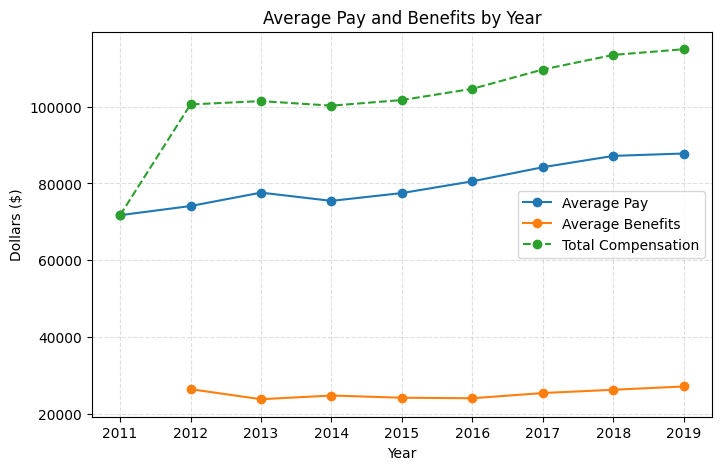

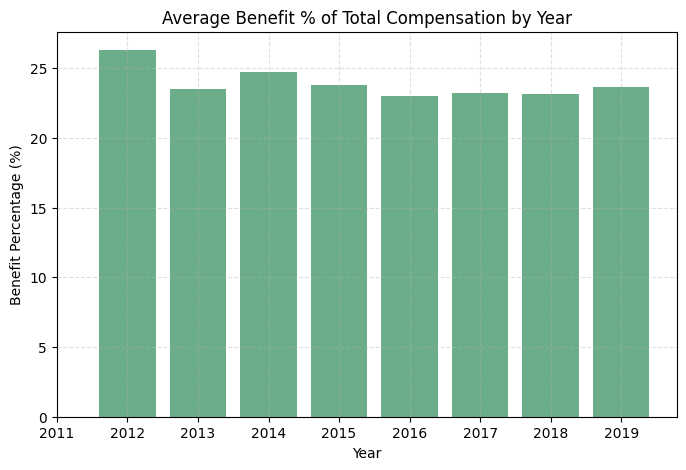

In [41]:
# Part 6.1: Average Pay and Benefit Trends by Year

# Reuse Q1 result if available; if not, re-run the query
query = """
SELECT
    year,
    ROUND(AVG(total_pay), 2) AS avg_total_pay,
    ROUND(AVG(benefits), 2) AS avg_benefits,
    ROUND(AVG(total_pay_benefits), 2) AS avg_total_comp,
    ROUND(AVG(benefits) * 100.00 / AVG(total_pay_benefits), 2) AS benefit_pct
FROM compensation_clean
GROUP BY year
ORDER BY year;
"""
trend = pd.read_sql_query(query, conn)

# Line chart for trends
plt.figure(figsize=(8,5))
plt.plot(trend["year"], trend["avg_total_pay"], marker="o", label="Average Pay")
plt.plot(trend["year"], trend["avg_benefits"], marker="o", label="Average Benefits")
plt.plot(trend["year"], trend["avg_total_comp"], marker="o", label="Total Compensation", linestyle="--")

plt.title("Average Pay and Benefits by Year")
plt.xlabel("Year")
plt.ylabel("Dollars ($)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# Second chart: Benefit % of total comp by year
plt.figure(figsize=(8,5))
plt.bar(trend["year"], trend["benefit_pct"], color="seagreen", alpha=0.7)
plt.title("Average Benefit % of Total Compensation by Year")
plt.xlabel("Year")
plt.ylabel("Benefit Percentage (%)")
plt.xticks(trend["year"])
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("avg_pay_and_benefits_by_year.png", dpi=300, bbox_inches="tight")
plt.savefig("avg_benefit_perc_of_total)comp.png", dpi=300, bbox_inches="tight")
plt.show()


### 6.2 Overtime-Heavy Job Titles
---

This visualization highlights the job titles that rely most heavily on overtime pay.  
These roles often indicate where departments experience high staffing demands, emergency work, or long-hour schedules.  
By identifying jobs with the highest overtime ratios, management can better understand cost drivers and potential burnout risks.


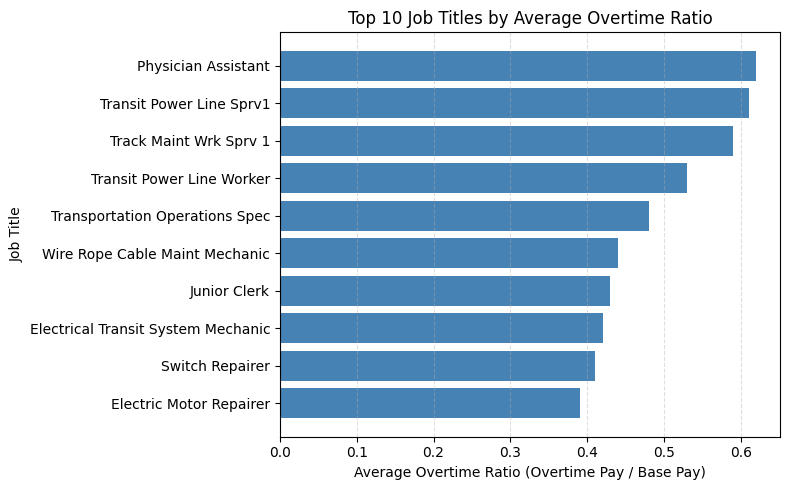

In [43]:
# Part 6.2: Overtime-Heavy Job Titles

query = """
SELECT 
    job_title,
    ROUND(AVG(overtime_ratio), 2) AS avg_overtime_ratio,
    COUNT(*) AS num_employees
FROM compensation_clean
WHERE overtime_ratio IS NOT NULL
GROUP BY job_title
HAVING COUNT(*) > 50
ORDER BY avg_overtime_ratio DESC
LIMIT 10;
"""
overtime_jobs = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(8,5))
plt.barh(
    overtime_jobs["job_title"],
    overtime_jobs["avg_overtime_ratio"],
    color="steelblue"
)
plt.gca().invert_yaxis()  # Highest at the top
plt.title("Top 10 Job Titles by Average Overtime Ratio")
plt.xlabel("Average Overtime Ratio (Overtime Pay / Base Pay)")
plt.ylabel("Job Title")
plt.grid(True, axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("top_jobs_avg_overtime_ratio.png", dpi=300, bbox_inches="tight")
plt.show()


### 6.3 Top Earners per Year
---

This visualization displays the top three highest-paid employees for each year based on total compensation (salary + benefits).  
It provides insight into how top-level earnings have changed over time and which roles consistently rank among the highest-paid positions in the city workforce.


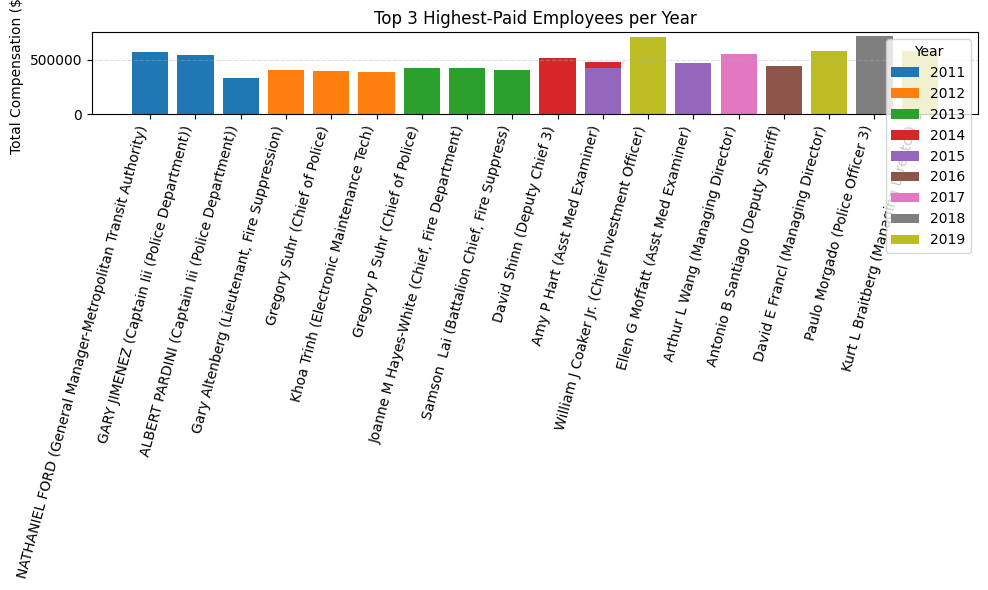

In [45]:
# Part 6.3: Top 3 Highest-Paid Employees per Year

query = """
SELECT
    year,
    employee_name,
    job_title,
    ROUND(total_pay_benefits, 2) AS total_comp
FROM (
    SELECT
        year,
        employee_name,
        job_title,
        total_pay_benefits,
        ROW_NUMBER() OVER (PARTITION BY year ORDER BY total_pay_benefits DESC) AS rank
    FROM compensation_clean
)
WHERE rank <= 3
ORDER BY year, total_comp DESC;
"""
top_per_year = pd.read_sql_query(query, conn)

# Create grouped bar chart
plt.figure(figsize=(10,6))
for year in sorted(top_per_year["year"].unique()):
    subset = top_per_year[top_per_year["year"] == year]
    plt.bar(
        subset["employee_name"] + " (" + subset["job_title"] + ")", 
        subset["total_comp"], 
        label=str(year)
    )

plt.title("Top 3 Highest-Paid Employees per Year")
plt.ylabel("Total Compensation ($)")
plt.xticks(rotation=75, ha="right")
plt.legend(title="Year")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("top_highest_paid_employees.png", dpi=300, bbox_inches="tight")
plt.show()


### 6.4 Benefit Ratio vs Total Compensation
---

This visualization explores the relationship between total compensation and benefit ratio (benefits ÷ total pay).  
It helps reveal whether employees with higher total compensation receive proportionally more or fewer benefits.  

A smoothed trendline is included to make the overall relationship clearer — showing whether benefit ratios tend to rise or fall as total compensation increases.


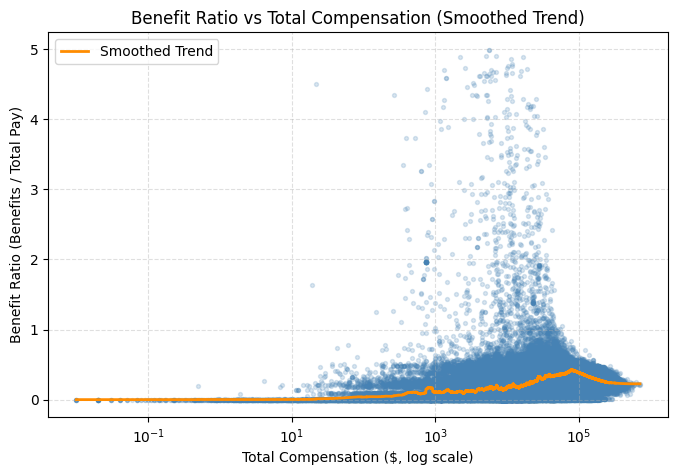

In [46]:
# Part 6.4: Benefit Ratio vs Total Compensation (Smoothed Scatter)

# Clean data for plotting
df_corr_filtered = df.dropna(subset=["benefit_ratio", "total_pay_benefits"]).copy()
df_corr_filtered = df_corr_filtered[df_corr_filtered["benefit_ratio"] < 5]  # remove extreme outliers
df_corr_filtered["benefit_ratio"] = pd.to_numeric(df_corr_filtered["benefit_ratio"], errors="coerce")
df_corr_filtered["total_pay_benefits"] = pd.to_numeric(df_corr_filtered["total_pay_benefits"], errors="coerce")
df_corr_filtered = df_corr_filtered.dropna(subset=["benefit_ratio", "total_pay_benefits"])

# Sort by total pay for rolling average smoothing
df_corr_sorted = df_corr_filtered.sort_values("total_pay_benefits").copy()
df_corr_sorted["smooth"] = df_corr_sorted["benefit_ratio"].rolling(1000, min_periods=1).mean()

# Plot scatter + trendline
plt.figure(figsize=(8,5))
plt.scatter(
    df_corr_sorted["total_pay_benefits"],
    df_corr_sorted["benefit_ratio"],
    alpha=0.2,
    s=8,
    color="steelblue"
)
plt.plot(
    df_corr_sorted["total_pay_benefits"],
    df_corr_sorted["smooth"],
    color="darkorange",
    linewidth=2,
    label="Smoothed Trend"
)
plt.xscale("log")
plt.title("Benefit Ratio vs Total Compensation (Smoothed Trend)")
plt.xlabel("Total Compensation ($, log scale)")
plt.ylabel("Benefit Ratio (Benefits / Total Pay)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


### 6.5 Full-Time vs Part-Time Comparison
---

This visualization compares **Full-Time (FT)** and **Part-Time (PT)** employees in terms of both **total compensation** and **benefit ratio**.  
It provides a quick, intuitive look at the differences revealed in the hypothesis tests — showing how part-time employees tend to receive a higher share of their total pay from benefits, even though their overall compensation is lower.


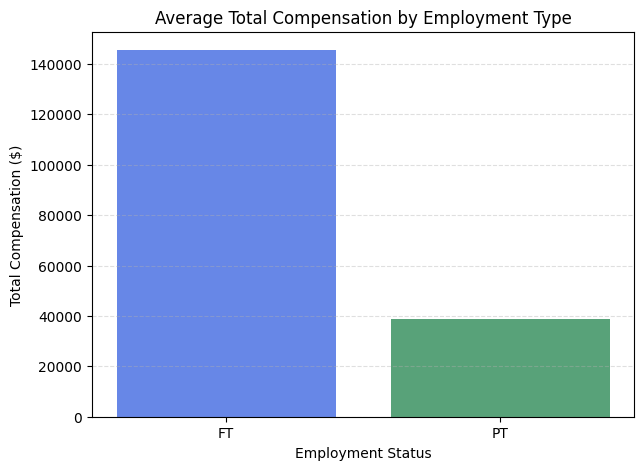

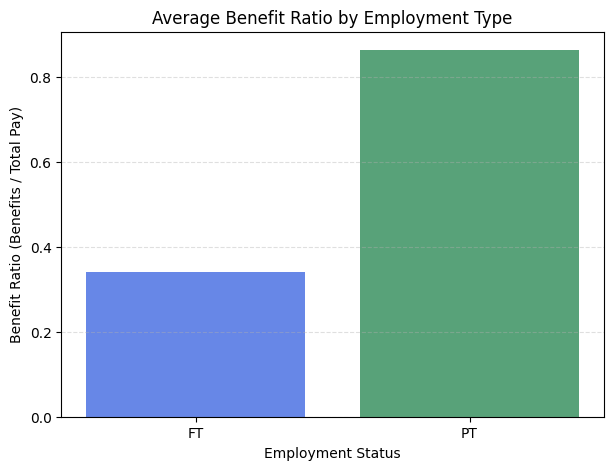

  status  total_pay_benefits  benefit_ratio
0     FT           145506.49          0.340
1     PT            38960.45          0.863


In [48]:
# Part 6.5: Full-Time vs Part-Time Comparison

# Prepare data
df_status = df.dropna(subset=["status", "benefit_ratio", "total_pay_benefits"])
df_status = df_status[df_status["status"].isin(["FT", "PT"])]

# Compute group means
summary_status = df_status.groupby("status").agg({
    "total_pay_benefits": "mean",
    "benefit_ratio": "mean"
}).reset_index()

# Round for readability
summary_status["total_pay_benefits"] = summary_status["total_pay_benefits"].round(2)
summary_status["benefit_ratio"] = summary_status["benefit_ratio"].round(3)

# --- Plot 1: Average Total Compensation by Status ---
plt.figure(figsize=(7,5))
plt.bar(summary_status["status"], summary_status["total_pay_benefits"], color=["royalblue", "seagreen"], alpha=0.8)
plt.title("Average Total Compensation by Employment Type")
plt.ylabel("Total Compensation ($)")
plt.xlabel("Employment Status")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

# --- Plot 2: Average Benefit Ratio by Status ---
plt.figure(figsize=(7,5))
plt.bar(summary_status["status"], summary_status["benefit_ratio"], color=["royalblue", "seagreen"], alpha=0.8)
plt.title("Average Benefit Ratio by Employment Type")
plt.ylabel("Benefit Ratio (Benefits / Total Pay)")
plt.xlabel("Employment Status")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.savefig("avg_total_comp_by_employment_type.png", dpi=300, bbox_inches="tight")
plt.savefig("avg_benefit_ratio_by_employment_type.png", dpi=300, bbox_inches="tight")
plt.show()

# Display numeric summary
print(summary_status)


## 📊 Part 6 Summary — Visualization & Dashboard
---

This section visually summarized the results of the data cleaning, analysis, and hypothesis testing phases.  
Each chart provided a different perspective on how San Francisco’s employee compensation structure functions across years, roles, and employment types.

**Key Takeaways:**
- **Pay and Benefits Over Time:**  
  Average total compensation has increased steadily, with benefits consistently forming a significant portion of employee costs.

- **Overtime-Heavy Roles:**  
  Certain public safety and infrastructure positions depend heavily on overtime pay, highlighting areas of operational strain.

- **Top Earners:**  
  The highest-paid employees are typically executives or specialized professionals with unique expertise or oversight responsibilities.

- **Benefits vs Compensation:**  
  Employees with lower total compensation receive proportionally more of their pay from benefits.

- **Full-Time vs Part-Time:**  
  Part-time employees earn less overall but have a higher benefit ratio, meaning benefits make up a larger share of their total pay.

**Conclusion:**  
The dashboard confirms the key analytical findings and provides a clear, data-driven narrative about workforce compensation.  
It demonstrates how data cleaning, SQL querying, and hypothesis testing can be combined to uncover meaningful insights through effective visual storytelling.
